In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
import os
warnings.filterwarnings("ignore")
import datetime

In [2]:
data=pd.read_csv('/content/data.csv')
data.head()
data.describe()
data.info()
data.shape
data.columns
data.value_counts
data.dtypes
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: int64

In [3]:
data.drop('Unnamed: 32', axis = 1, inplace = True)
data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

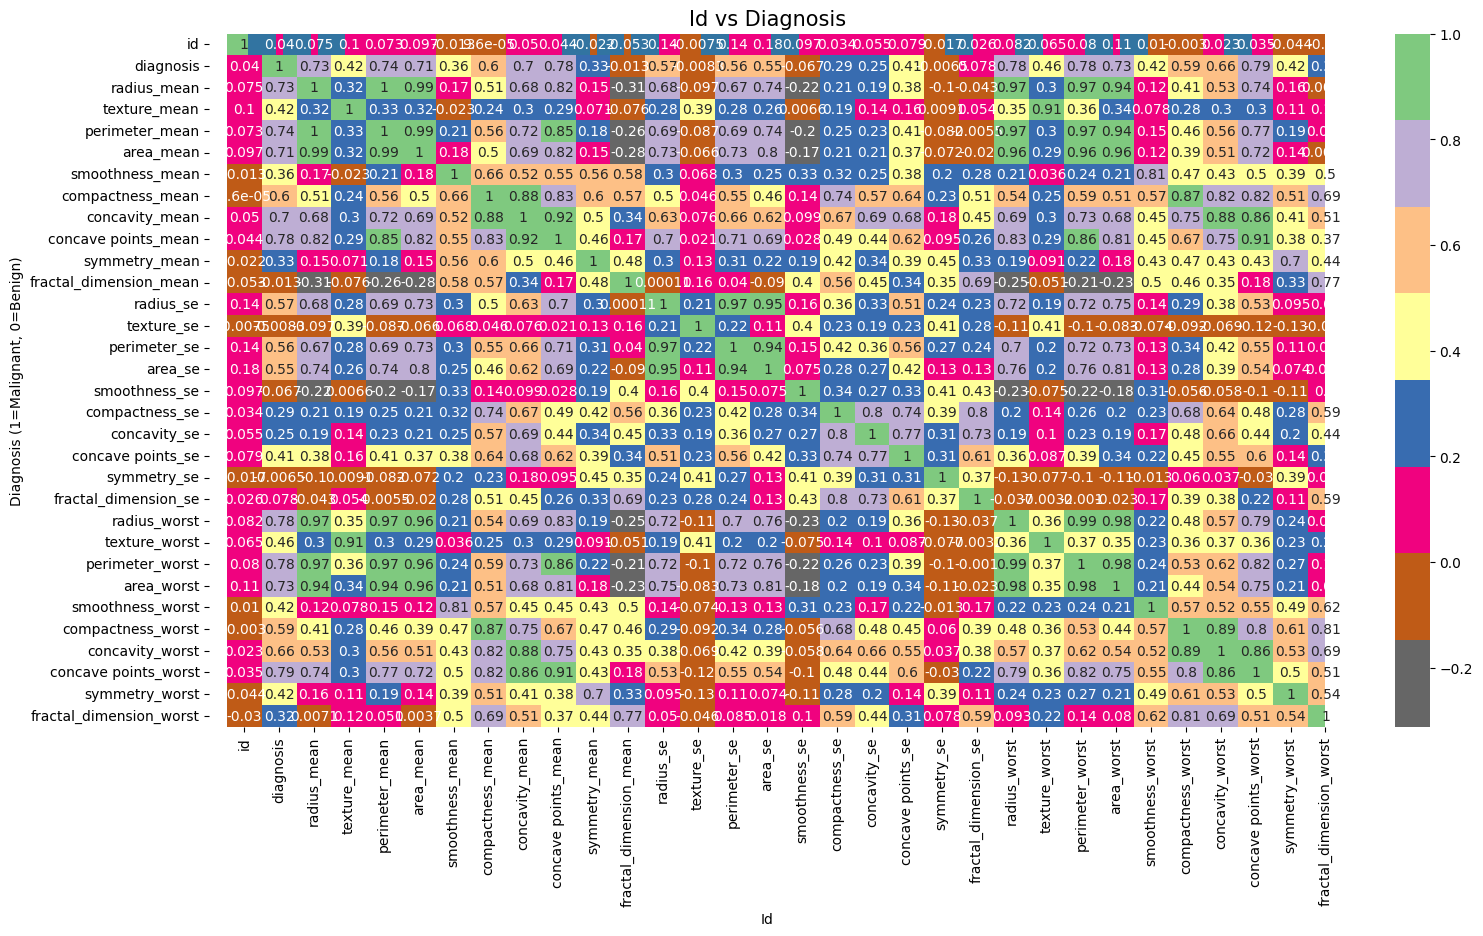

In [5]:
# Before calculating correlation, convert 'diagnosis' column to numerical values
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # Map 'M' to 1 and 'B' to 0

# Now you can calculate the correlation
data.corr()
plt.figure(figsize=(18,9))
sns.heatmap(data.corr(),annot = True, cmap ="Accent_r")

# For the barplot, you can revert 'diagnosis' back to its original values if needed,
# or keep it as numerical and adjust the plot labels accordingly.
# For example, if keeping it numerical:
sns.barplot(x="id", y="diagnosis", data=data[160:190])
plt.title("Id vs Diagnosis", fontsize=15)
plt.xlabel("Id")
plt.ylabel("Diagnosis (1=Malignant, 0=Benign)") # Update y-axis label
plt.show()
plt.style.use("ggplot")

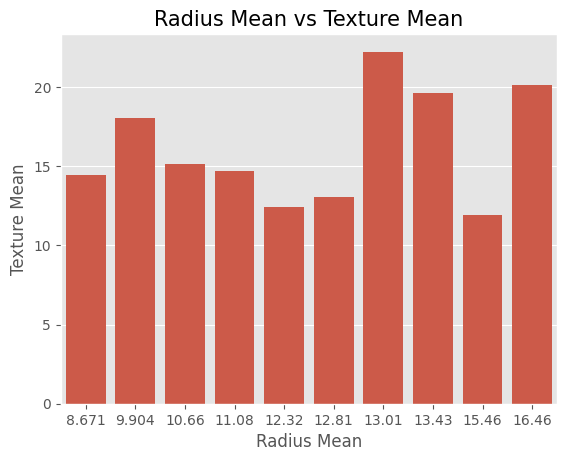

In [6]:
sns.barplot(x="radius_mean", y="texture_mean", data=data[170:180])
plt.title("Radius Mean vs Texture Mean",fontsize=15)
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.show()
plt.style.use("ggplot")


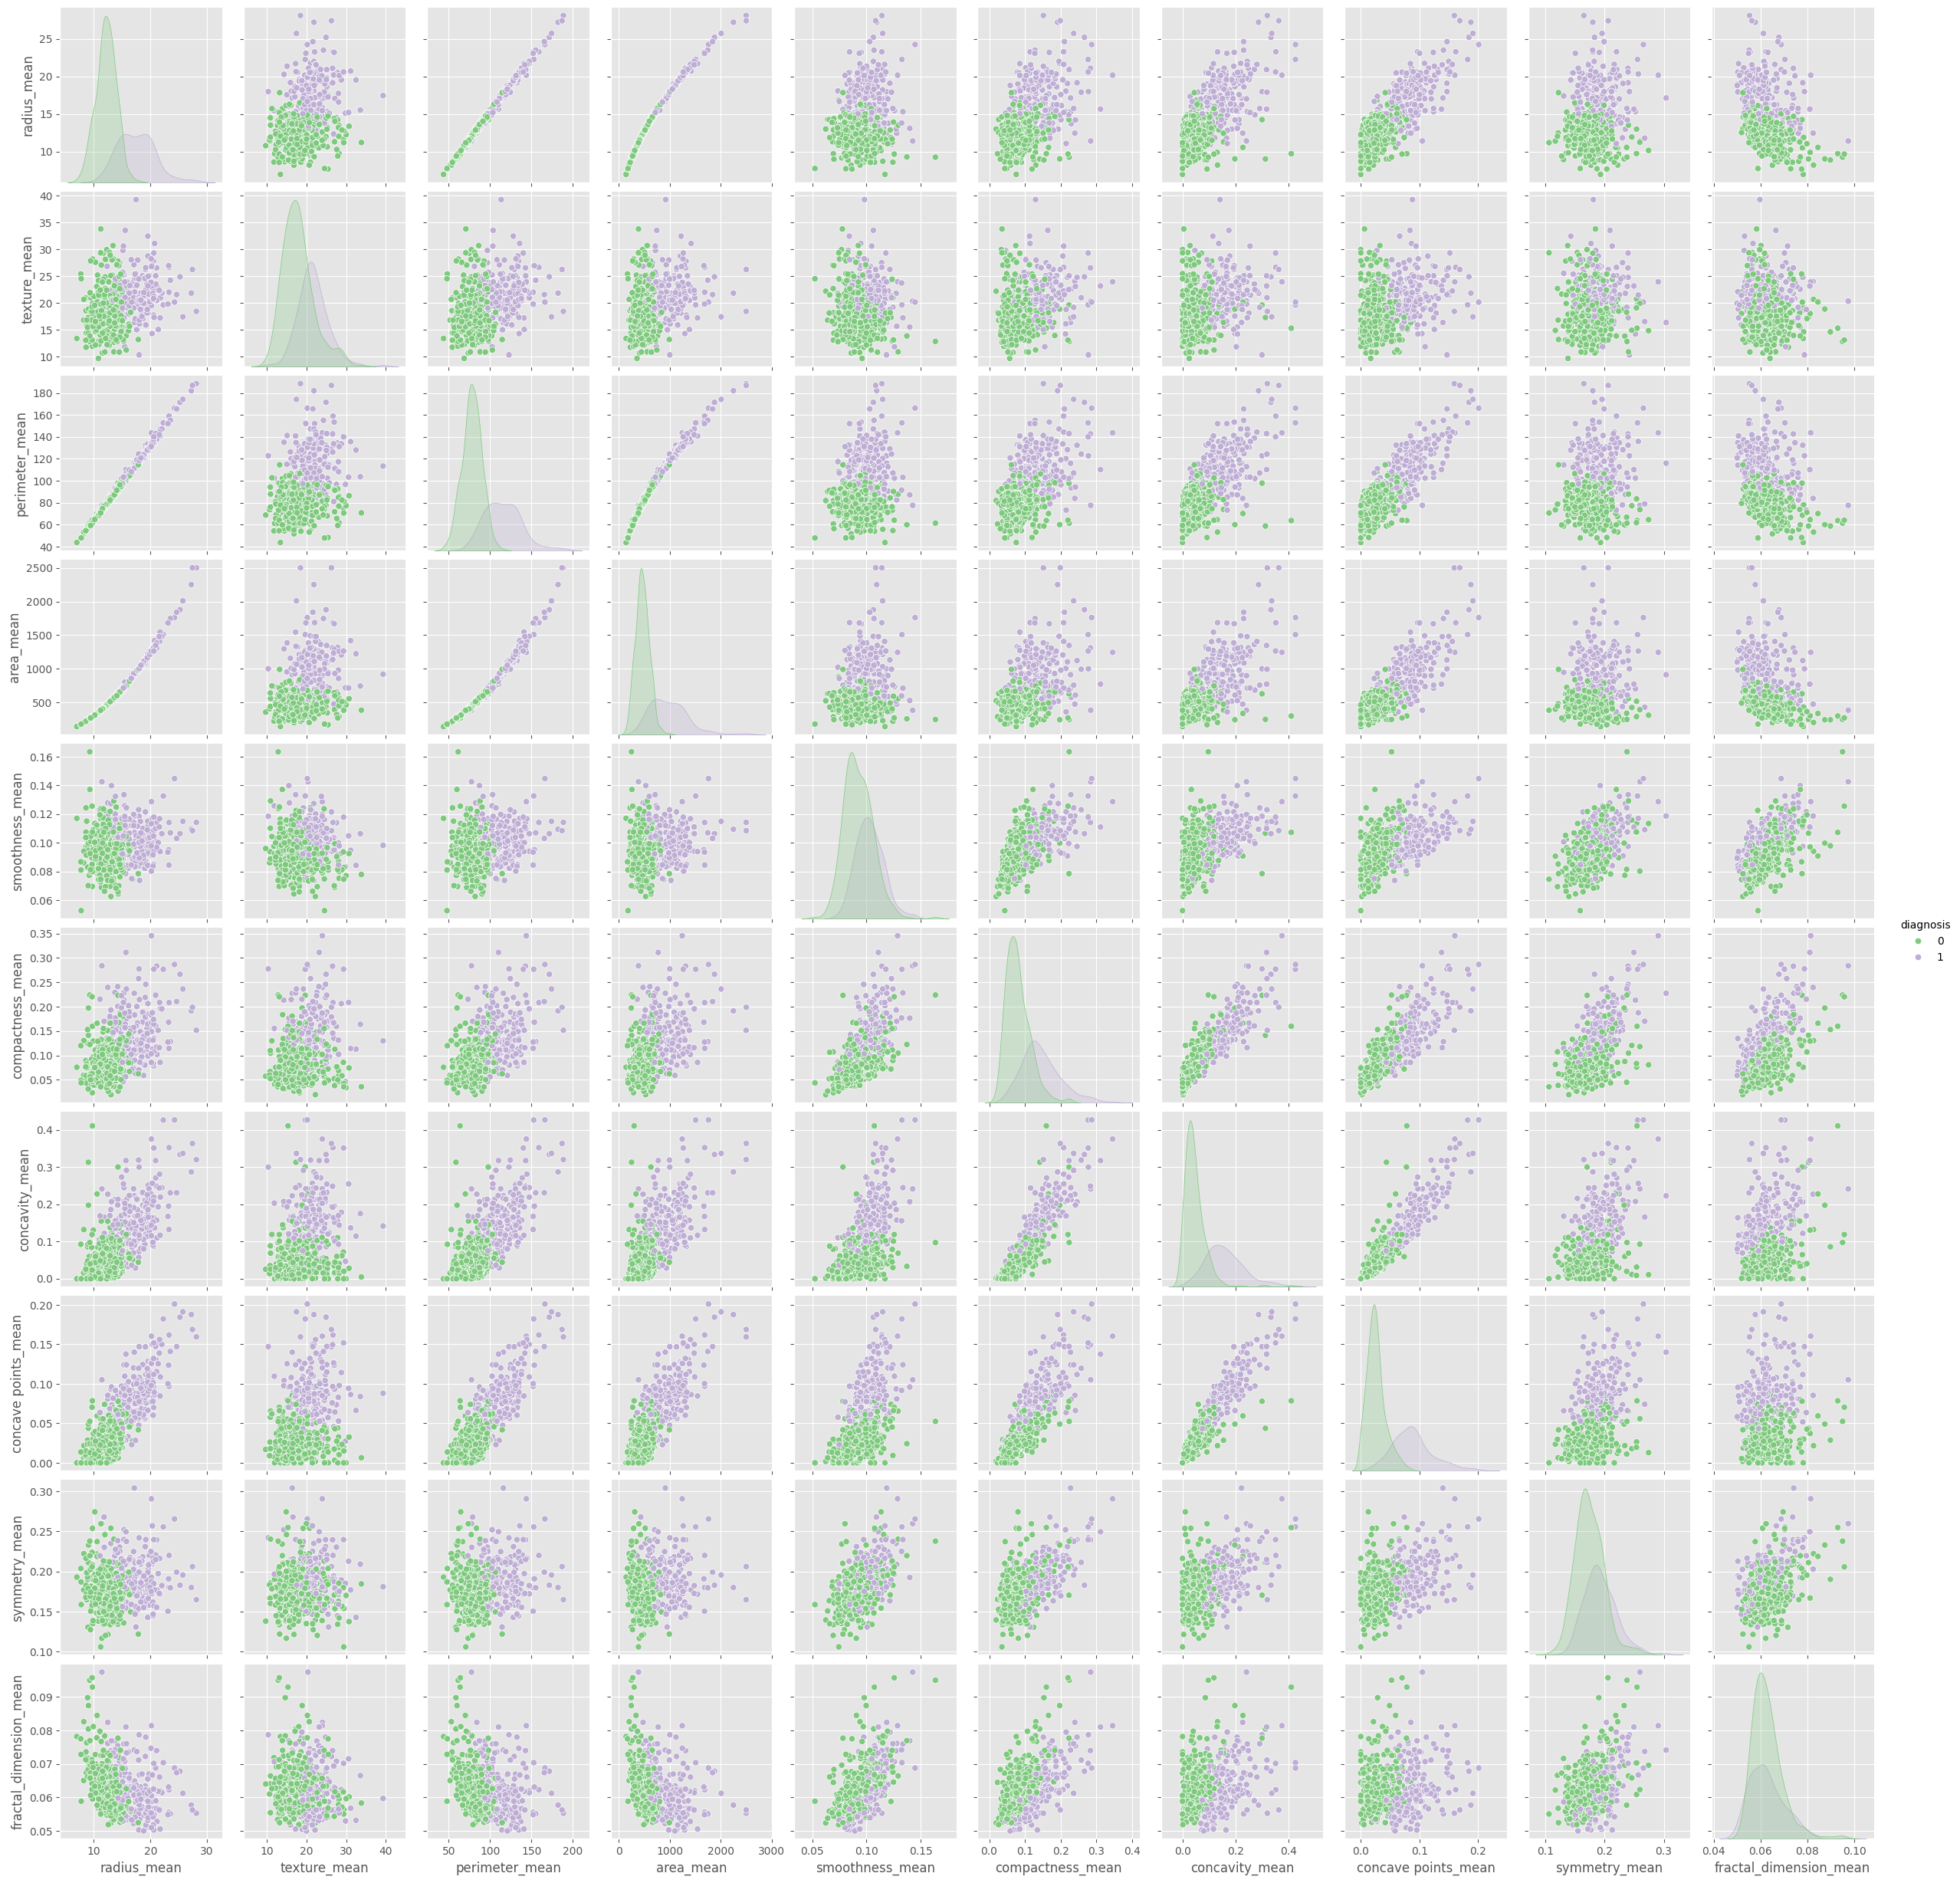

In [7]:

mean_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

sns.pairplot(data[mean_col],hue = 'diagnosis', palette='Accent')


<Axes: xlabel='smoothness_mean', ylabel='perimeter_mean'>

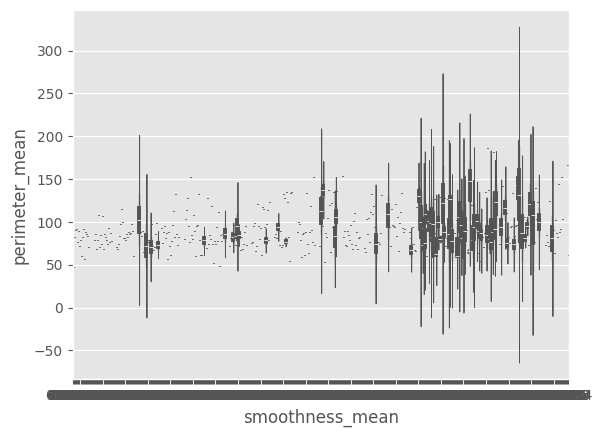

In [8]:
sns.violinplot(x="smoothness_mean",y="perimeter_mean",data=data)

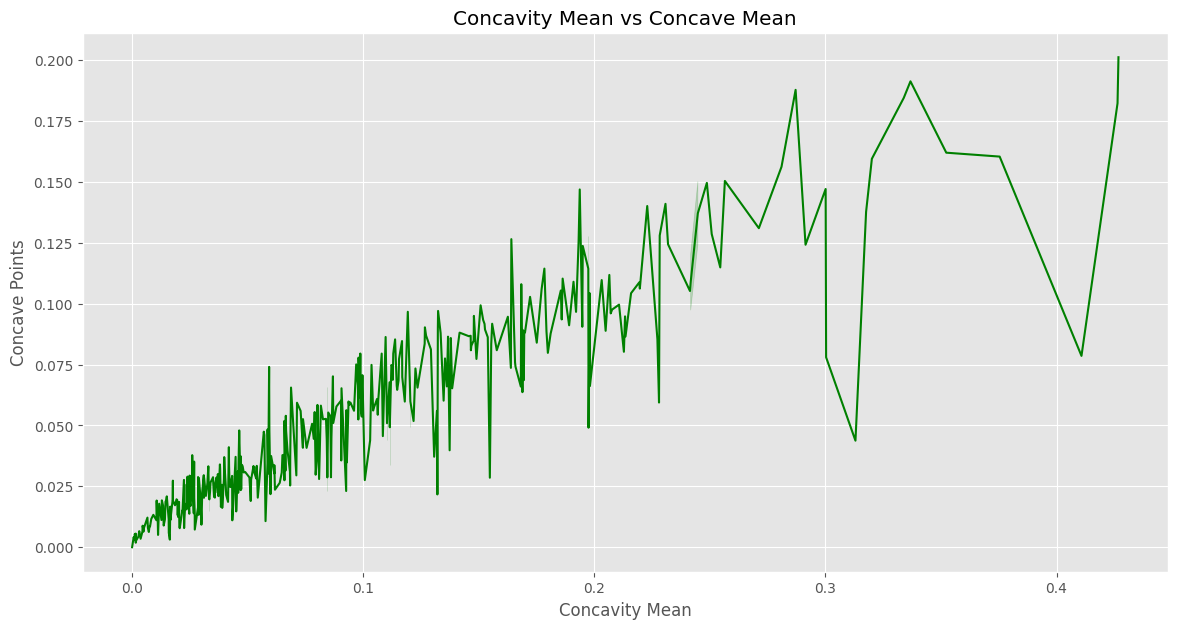

In [9]:
plt.figure(figsize=(14,7))
sns.lineplot(x = "concavity_mean",y = "concave points_mean",data = data[0:400], color='green')
plt.title("Concavity Mean vs Concave Mean")
plt.xlabel("Concavity Mean")
plt.ylabel("Concave Points")
plt.show()

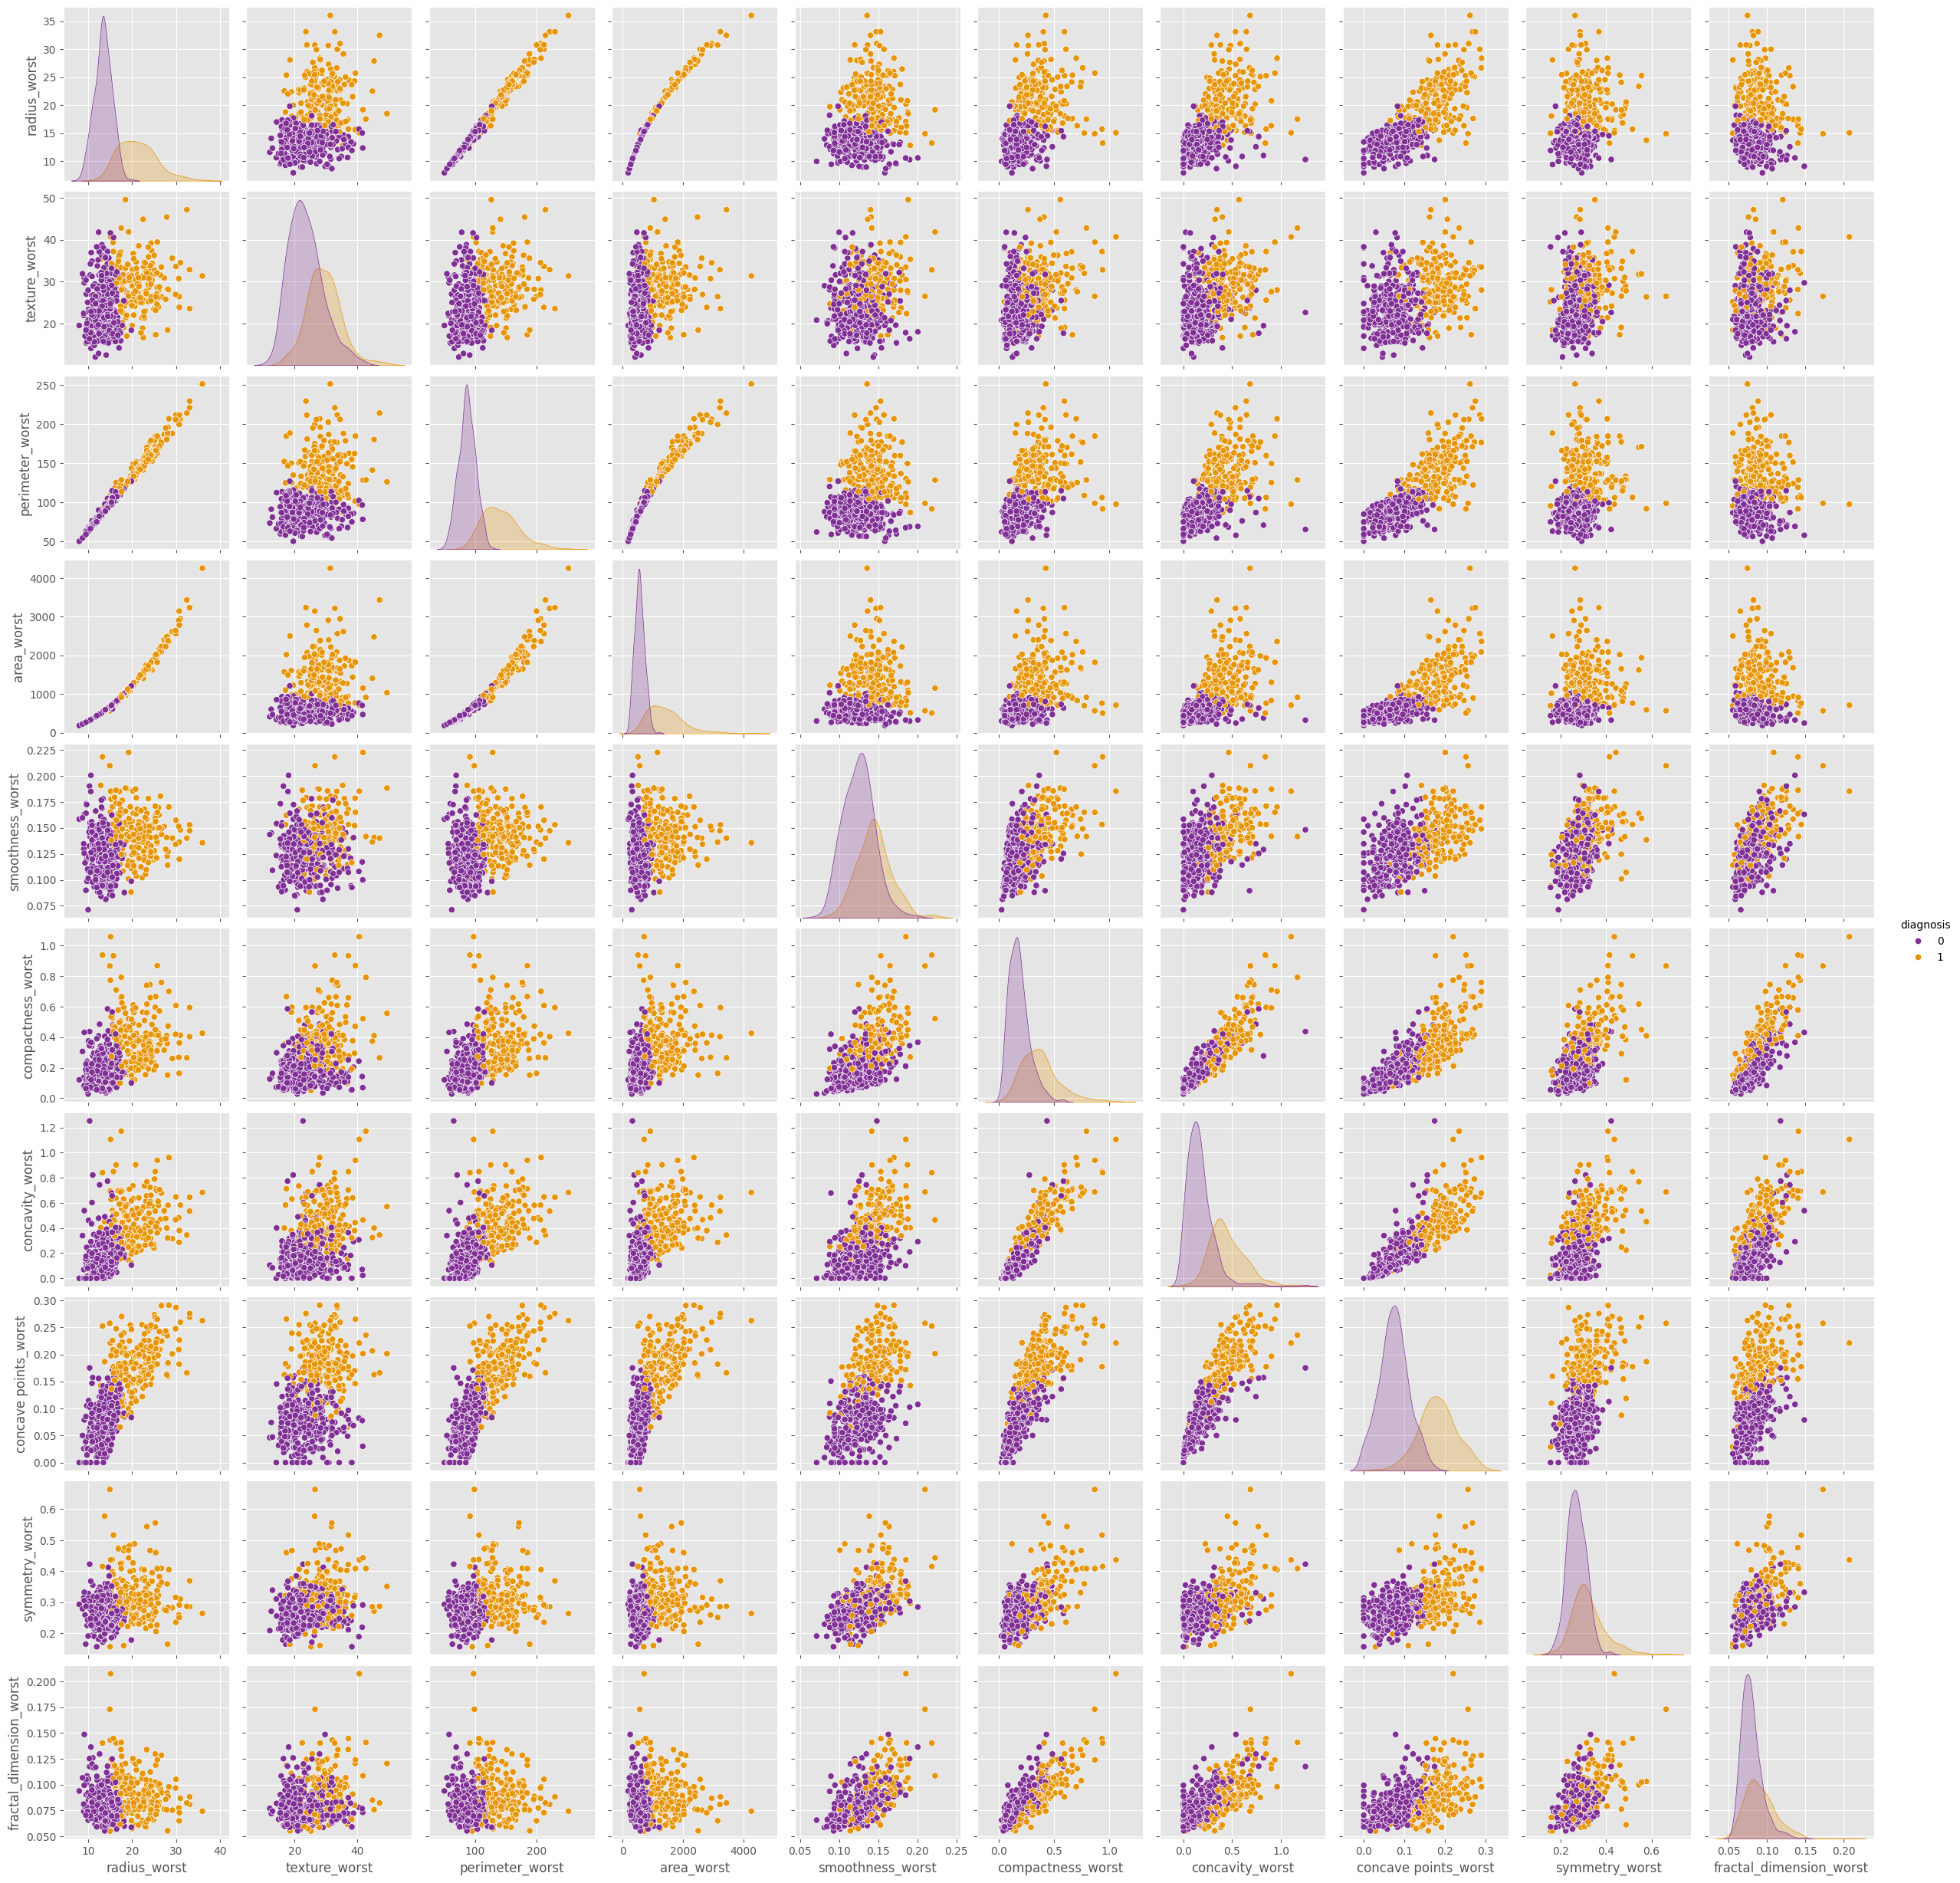

In [10]:
worst_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

sns.pairplot(data[worst_col],hue = 'diagnosis', palette="CMRmap")

In [11]:
x = data.drop(columns = 'diagnosis')

# Getting Predicting Value
y = data['diagnosis']

In [12]:
#train_test_splitting of the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

455
114
455
114


In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)


RandomForestClassifier()

In [50]:
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",reg.score(x_train,y_train)*100)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114

[[66  1]
 [ 7 40]]
Training Score:  91.42857142857143


In [20]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

Actual  Predicted
512       1          1
457       0          0
439       0          0
298       0          0
37        0          0
..      ...        ...
213       1          0
519       0          0
432       1          1
516       1          1
500       0          0

[114 rows x 2 columns]

In [51]:
print(accuracy_score(y_test,y_pred)*100)

92.98245614035088


In [22]:
from sklearn.model_selection import GridSearchCV
param = {
         'penalty':['l1','l2'],
         'C':[0.001, 0.01, 0.1, 1, 10, 20,100, 1000]
}
lr= LogisticRegression(penalty='l1')
cv=GridSearchCV(reg,param,cv=5,n_jobs=-1)
cv.fit(x_train,y_train)
cv.predict(x_test)

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0])

In [23]:
print("Best CV score", cv.best_score_*100)

Best CV score 91.64835164835165


In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=6, n_estimators=100, random_state=125)
gbc.fit(x_train, y_train)

#y_pred = gbc.predict(x_test)


GradientBoostingClassifier(max_depth=6, random_state=125)

In [58]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",dtree.score(x_train,y_train)*100)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

[[63  4]
 [ 2 45]]
Training Score:  99.34065934065934


In [59]:
from sklearn.svm import SVC
svc = SVC(random_state=125)
svc.fit(x_train, y_train)

SVC(random_state=125)

In [60]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",rfc.score(x_train,y_train)*100)


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

[[65  2]
 [ 2 45]]
Training Score:  100.0


In [56]:
print(accuracy_score(y_test,y_pred)*100)

94.73684210526315


In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [64]:
y_pred=knn.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",knn.score(x_train,y_train)*50)
print(knn.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.67      0.97      0.79        67
           1       0.88      0.32      0.47        47

    accuracy                           0.70       114
   macro avg       0.78      0.64      0.63       114
weighted avg       0.76      0.70      0.66       114

[[65  2]
 [32 15]]
Training Score:  38.681318681318686
0.7017543859649122


In [66]:
print(accuracy_score(y_test,y_pred)*50)

35.08771929824561


In [32]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [67]:
y_pred=svc.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",svc.score(x_train,y_train)*50)
print(svc.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74        67
           1       0.00      0.00      0.00        47

    accuracy                           0.59       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.35      0.59      0.44       114

[[67  0]
 [47  0]]
Training Score:  31.868131868131865
0.5877192982456141


In [68]:
print("Training Score: ",svc.score(x_train,y_train)*50)

Training Score:  31.868131868131865


In [69]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=123)
xgb.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [70]:
y_pred=adb.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",adb.score(x_train,y_train)*50)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

[[67  0]
 [ 2 45]]
Training Score:  50.0


In [71]:
print(accuracy_score(y_test,y_pred)*50)

49.122807017543856


In [73]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(random_state=125)
adb.fit(x_train, y_train)


AdaBoostClassifier(random_state=125)

In [74]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",gbc.score(x_train,y_train)*50)
print(gbc.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        67
           1       0.86      0.94      0.90        47

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

[[60  7]
 [ 3 44]]
Training Score:  50.0
0.9122807017543859


In [75]:
print(accuracy_score(y_test,y_pred)*50)

45.614035087719294


In [42]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)


XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, ...)

In [76]:
y_pred=xgb.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",xgb.score(x_train,y_train)*50)
print(xgb.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

[[66  1]
 [ 1 46]]
Training Score:  50.0
0.9824561403508771


In [77]:
print("Training Score: ",xgb.score(x_train,y_train)*50)

Training Score:  50.0


In [45]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

Actual  Predicted
512       1          1
457       0          0
439       0          0
298       0          0
37        0          0
..      ...        ...
213       1          1
519       0          0
432       1          1
516       1          1
500       0          0

[114 rows x 2 columns]

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=125)
gbc.fit(x_train, y_train)


GradientBoostingClassifier(random_state=125)

In [79]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print("Training Score: ",gnb.score(x_train,y_train)*50)
print(gnb.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.59      0.99      0.74        67
           1       0.67      0.04      0.08        47

    accuracy                           0.60       114
   macro avg       0.63      0.51      0.41       114
weighted avg       0.62      0.60      0.47       114

[[66  1]
 [45  2]]
0.5964912280701754
Training Score:  31.648351648351646
0.5964912280701754


In [80]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

Actual  Predicted
512       1          0
457       0          0
439       0          0
298       0          0
37        0          0
..      ...        ...
213       1          1
519       0          0
432       1          0
516       1          0
500       0          0

[114 rows x 2 columns]